<a href="https://colab.research.google.com/github/Laleteli/-proyecto_ventas/blob/main/lorenaletelier_tareamodulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('medical_appoinment.csv')

In [9]:
# Mostrar las primeras filas
print(df.head())
# Información general del dataset
print(df.info())
# Estadísticas descriptivas básicas
print(df.describe())
# Verificar valores faltantes
print(df.isnull().sum())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

1. SELECCIÓN Y EXPLORACIÓN DE CONJUNTO DE DATOS:
Se selecciona la base de datos "Medical Appointment No Shows: Tabla con información de pacientes que no asisten a citas médicas. Enlace a Kaggle"
Se realiza el primer análsis de los datos.
head() muestra las primeras filas para tener una idea de la estructura.
info() permite conocer los tipos de datos y detectar columnas con datos faltantes.
describe() calcula estadísticas básicas.
isnull().sum()indica cuántos valores faltantes hay por columna.

2. PREPROCESAMIENTO DE DATOS
En esta base de datos no hay datos faltantes, por lo tanto tampoco hay nada que imputar.
Normalizo "edad" y "daysbetween" ya que son valores son numéricos y están en escalas distintas. La edad puede ir de 0 a 100, daysbetween puede ir desde valores negativos a mas de 100. Al normalizarlos ambas variables aportan de manera equitativa al modelo. RobustScaler coloca los valores en una escala similar.





        Age  DaysBetween
0  0.675676    -0.266667
1  0.513514    -0.266667
2  0.675676    -0.266667
3 -0.783784    -0.266667
4  0.513514    -0.266667
✅ Porcentaje de pacientes con diabetes: 7.19%
✅ Porcentaje de pacientes con hipertensión: 19.72%
✅ Porcentaje de pacientes con alguna discapacidad: 2.22%
✅ Porcentaje de pacientes con alcoholismo: 3.04%
✅ Porcentaje de pacientes F: 65.00%
✅ Porcentaje de pacientes M: 35.00%


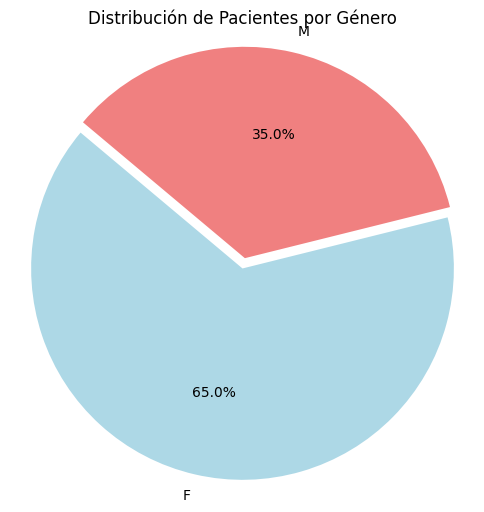

In [43]:
# Importar librerías
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Cargo el dataset
df = pd.read_csv('medical_appoinment.csv')

# Crear columna DaysBetween (diferencia en días entre cita y agendamiento)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# columnas a normalizar
columnas_a_escalar = ['Age', 'DaysBetween']

# Aplico RobustScaler
scaler = RobustScaler()
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Visualización de los datos transformados
print(df[['Age', 'DaysBetween']].head())
total_pacientes = len(df)

# Calcular porcentajes
porcentaje_diabetes = (df['Diabetes'].sum() / total_pacientes) * 100
porcentaje_hipertension = (df['Hipertension'].sum() / total_pacientes) * 100
porcentaje_discapacidad = (df['Handcap'].sum() / total_pacientes) * 100

# Mostrar resultados
print(f"✅ Porcentaje de pacientes con diabetes: {porcentaje_diabetes:.2f}%")
print(f"✅ Porcentaje de pacientes con hipertensión: {porcentaje_hipertension:.2f}%")
print(f"✅ Porcentaje de pacientes con alguna discapacidad: {porcentaje_discapacidad:.2f}%")
# Contar cuántos pacientes hay por género
conteo_genero = df['Gender'].value_counts()

# Número de pacientes con alcoholismo
pacientes_con_alcoholismo = df['Alcoholism'].sum()

# Calcular porcentaje
porcentaje_alcoholismo = (pacientes_con_alcoholismo / total_pacientes) * 100

# Mostrar resultado
print(f"✅ Porcentaje de pacientes con alcoholismo: {porcentaje_alcoholismo:.2f}%")

# Calcular porcentaje
porcentaje_genero = (conteo_genero / total_pacientes) * 100

# Mostrar resultados
for genero, porcentaje in porcentaje_genero.items():
    print(f"✅ Porcentaje de pacientes {genero}: {porcentaje:.2f}%")
# Contar pacientes por género
conteo_genero = df['Gender'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(conteo_genero,
        labels=conteo_genero.index,
        autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'],
        startangle=140,
        explode=(0.05, 0))  # resalta el primer segmento

# Estética
plt.title('Distribución de Pacientes por Género')
plt.axis('equal')  # Mantiene el círculo redondo
plt.show()


3. ANÁLISIS DESCRIPTIVO:
Edad: va de los 0 a los 115 años (se corrige valor -1 por la mediana), la media es de 37,09 y la mediana de 37 años, una DS de 23,11 años. La muestra corresponde en un 65% a sexo femenino y un 35% a sexo masculino. De la muestra el 19,7% es hipertenso, el 7,19% es diabetico, el 3% es alcoholico y el 2,2% presenta algún tipo de discapacidad. 20.2% de los pacientes no asistió  a la cita médica.



<ipython-input-38-ba71ae70c18b>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Gender'])['No-show'].mean().reset_index()


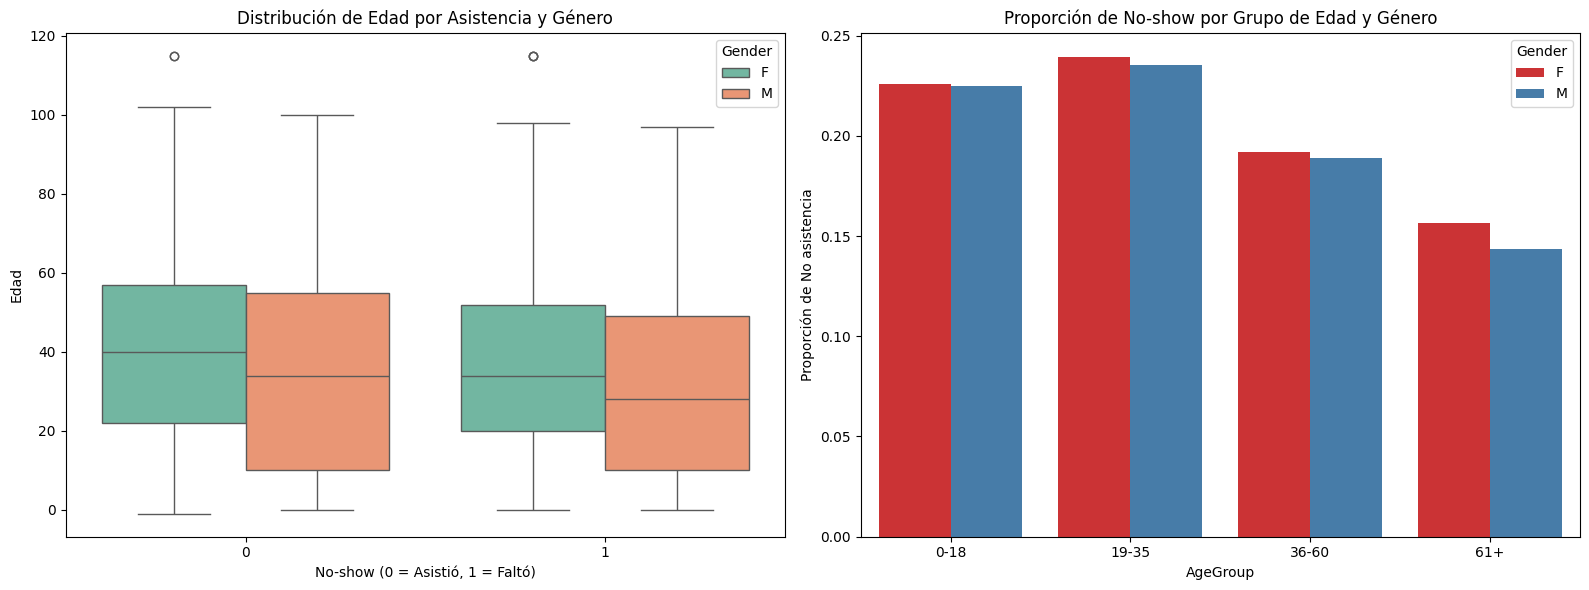

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Reemplazar el valor -1 por la mediana de la edad
age_mean = df['Age'].mean()
df['Age'] = df['Age'].replace(-1, age_mean)
# 1. Cargar datos (si no están ya cargados)
df = pd.read_csv("medical_appoinment.csv")
# Convertir la columna 'No-show' a binaria: 0 = asistió, 1 = faltó
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
# Creo rangos de edad y los asigno como nueva columna categórica
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '19-35', '36-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(16, 6))

# Primer gráfico (boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='No-show', y='Age', hue='Gender', palette='Set2')
plt.title('Distribución de Edad por Asistencia y Género')
plt.xlabel('No-show (0 = Asistió, 1 = Faltó)')
plt.ylabel('Edad')
# Agrupar datos por grupo de edad y género, y calcular proporción promedio de inasistencia
grouped = df.groupby(['AgeGroup', 'Gender'])['No-show'].mean().reset_index()
# Segundo gráfico (barras)
plt.subplot(1, 2, 2)
sns.barplot(data=grouped, x='AgeGroup', y='No-show', hue='Gender', palette='Set1')
plt.title('Proporción de No-show por Grupo de Edad y Género')
plt.ylabel('Proporción de No asistencia')
plt.tight_layout()
plt.show()

<ipython-input-44-cfc78bb5e133>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=miss_rate.values, y=miss_rate.index, palette='Reds_r')


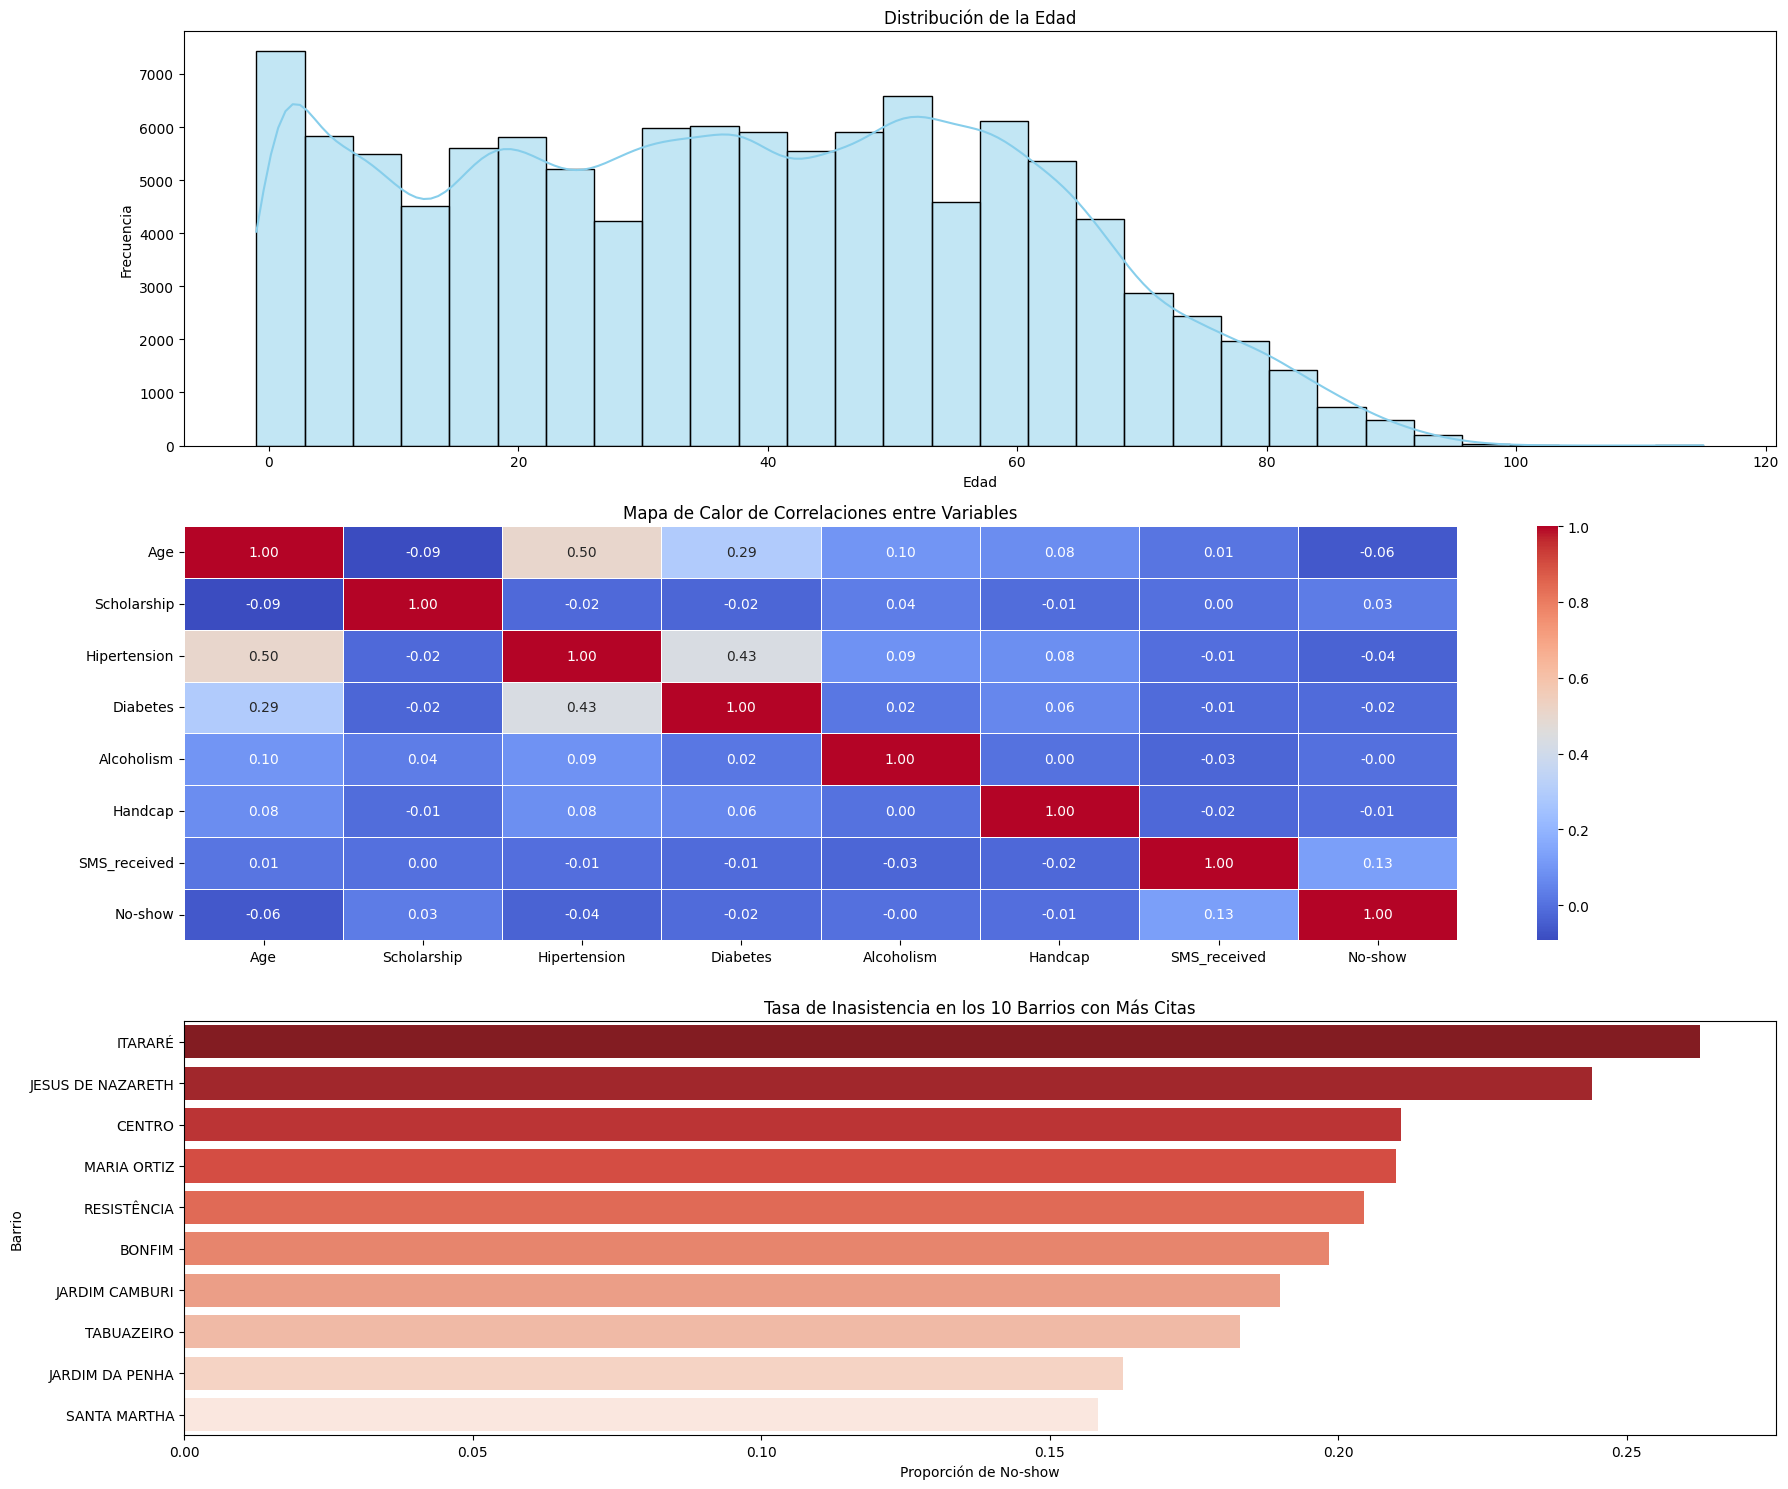

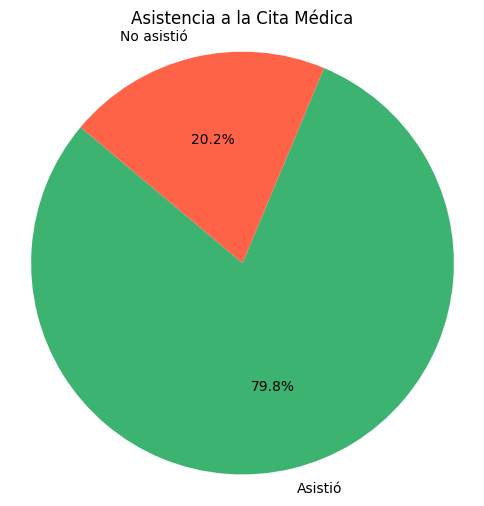

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Reemplazar el valor -1 por la mediana de la edad
age_mean = df['Age'].mean()
df['Age'] = df['Age'].replace(-1, age_mean)
df = pd.read_csv("medical_appoinment.csv")
# Convertir 'No-show' a binaria: 0 = asistió, 1 = faltó
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
# Crear grupos de edad
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '19-35', '36-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(18, 15))

# ----------------------------------
# Gráfico 1: Distribución de la Edad
# ----------------------------------
plt.subplot(3, 1, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# ----------------------------------
# Gráfico 2: Mapa de Calor de Correlaciones
# ----------------------------------
plt.subplot(3, 1, 2)
corr = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes',
           'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')

# ----------------------------------
# Gráfico 3: Tasa de No-show por Barrio (Top 10)
# ----------------------------------
plt.subplot(3, 1, 3)
top_neigh = df['Neighbourhood'].value_counts().nlargest(10).index
top_data = df[df['Neighbourhood'].isin(top_neigh)]
miss_rate = top_data.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False)

sns.barplot(x=miss_rate.values, y=miss_rate.index, palette='Reds_r')
plt.title('Tasa de Inasistencia en los 10 Barrios con Más Citas')
plt.xlabel('Proporción de No-show')
plt.ylabel('Barrio')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
# Conteo de asistencia vs no asistencia
conteo_asistencia = df['No-show'].value_counts()

# Gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(conteo_asistencia,
        labels=['Asistió', 'No asistió'],
        autopct='%1.1f%%',
        colors=['mediumseagreen', 'tomato'],
        startangle=140)
plt.title('Asistencia a la Cita Médica')
plt.axis('equal')
plt.show()

4.VISUALIZACIÓN DE DATOS

-Gráfico de distribución de la edad: La mayoría de los pacientes se encuentran entre los 0 y 60 años de edad.Hay una gran concentración de pacientes jóvenes, pero también algunos adultos mayores.

-Gráfico de distribución de edad por asistencia y genero: se visualiza que la aistencia se asociaa a mujeres y hombres con una media de edad levemente mayor que los que no asistieron a su cita.

-Gráfico de No-show por grupo de edad y género: La mayor inasistencia se observa tanto en hombres como en mujeres  entre los 19 y 35 años, seguidos por el rango de edad entre 0 y 18 años.

-Gráfico de Mapa de calor de correlaciones de variables: La correlación más notable es entre SMS_received y No-show (~0.13), lo que sugiere una ligera asociación entre recibir un mensaje y no ir a la cita. Quizas se envía un SMS a pacientes con historial de faltar anteriormente a sus citas. Otras correlaciones observadas y lógicas del punto de vista clínico serían: Edad e Hipertensión arterial 0,49 indica que los pacientes mayores tienden a tener hipertensión. Edad y diabetes, a mayor edad mayor enfermedad de diabetes(0.32). Eda y discapacidad, las personas mayores tienden a tener mayor discapacidad (0,18).La variable No-show no tiene una correlación fuerte con ninguna variable individual, lo cual sugiere que puede depender de varios factores combinados, no solo de uno, o que se requieren modelos más complejos.




-Gráfico de Tasa de inasistencia de los 10 barrios con mas citas: Algunos barrios tienen una tasa significativamente más alta de inasistencia, lo que puede estar asociado con factores socioeconómicos o de accesibilidad.
La edad es 0.06, lo que indica que las personas mas jovenes tienden a faltar más a sus citas que las mayores.